In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
import tensorflow as tf
import seaborn as sns
import time as time

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
mnist

<module 'keras.api.datasets.mnist' from 'c:\\Users\\Nitesh\\anaconda3\\envs\\PytonProject\\Lib\\site-packages\\keras\\api\\datasets\\mnist\\__init__.py'>

In [6]:
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

In [7]:
X_test_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_test_full.shape

(10000, 28, 28)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

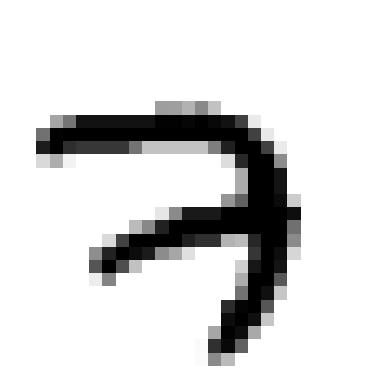

In [12]:
plt.imshow(X_train_full[5000],cmap = 'binary')
plt.axis("off")

<Axes: >

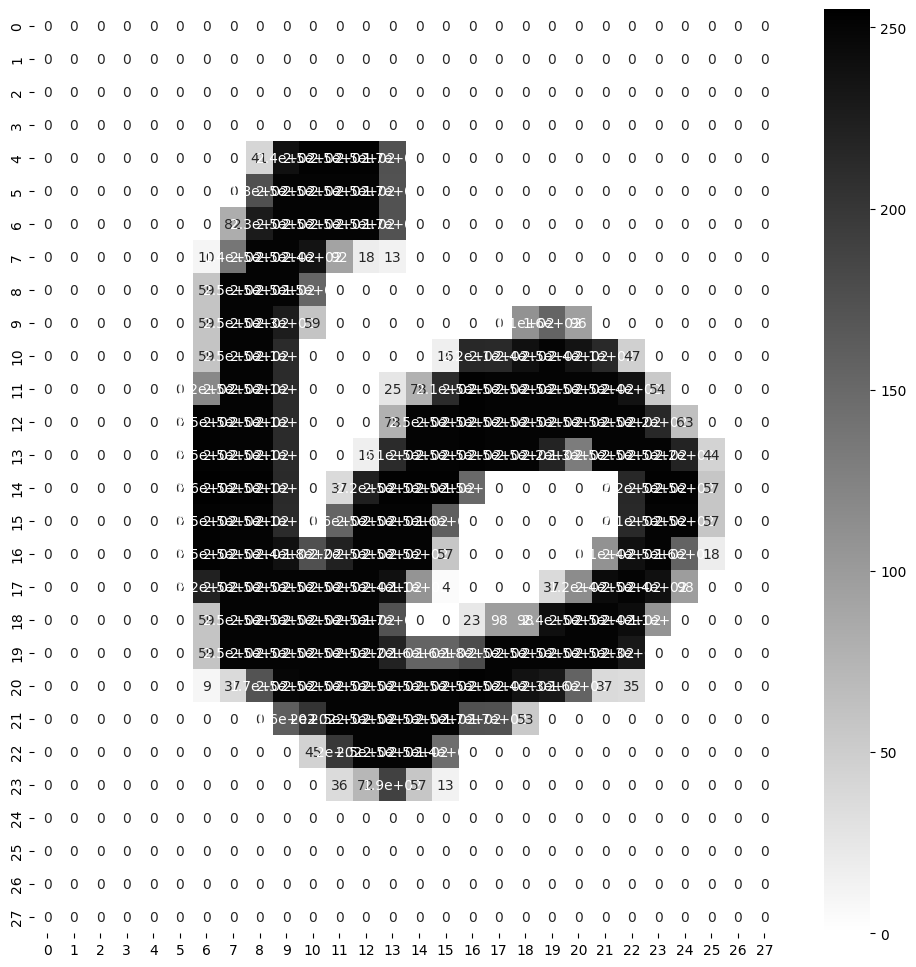

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train_full[9000], annot=True,cmap='binary')

In [14]:
# Scale the data between 0 to 1 by dividingt it by 255. As its an unsigned data between 0-255 range.
X_valid, X_train = X_train_full[:5000] / 255. , X_train_full[5000:] /255.
y_valid, y_train = y_train_full[:5000] / 255. , y_train_full[5000:] /255.

In [ ]:
# Scale the test set as well
X_test = X_test_full / 255.

In [15]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


<Axes: >

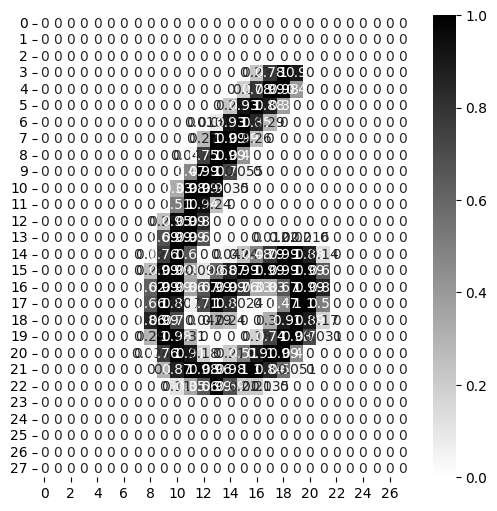

In [16]:
plt.figure(figsize=(6,6))
sns.heatmap(X_train[1000], annot=True,cmap='binary')

In [17]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
          tf.keras.layers.Dense(300, activation='relu', name= 'hiddenlayer1'),
          tf.keras.layers.Dense(100, activation='relu', name = 'hiddenlayer2'),
          tf.keras.layers.Dense(10, activation='softmax', name= 'outputlayer')]

c:\Users\Nitesh\anaconda3\envs\PytonProject\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model = tf.keras.models.Sequential(LAYERS)

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputlayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZER = 'ADAM'
METRICS = ['accuracy']

In [21]:
model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [22]:
model.layers

[<Flatten name=inputlayer, built=True>,
 <Dense name=hiddenlayer1, built=True>,
 <Dense name=hiddenlayer2, built=True>,
 <Dense name=outputlayer, built=True>]

In [23]:
hidden1 = model.layers[1]

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0975 - loss: 0.0229 - val_accuracy: 0.0958 - val_loss: 9.8128e-08
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0979 - loss: 9.2655e-08 - val_accuracy: 0.0958 - val_loss: 1.7524e-08
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0987 - loss: 2.1114e-08 - val_accuracy: 0.0958 - val_loss: 6.1035e-09
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1001 - loss: 6.5365e-09 - val_accuracy: 0.0958 - val_loss: 2.8610e-09
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0987 - loss: 2.9222e-09 - val_accuracy: 0.0958 - val_loss: 1.5259e-09


In [30]:
def saveModel_path(model_dir= "SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%H_%M_%S_.h5")
    model_path = os.path.join(model_dir, fileName)
    print(f"Your model will be saved at the following location \n{model_path}")

    return model_path

In [31]:
model.save(saveModel_path())

NameError: name 'time' is not defined